In [28]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [29]:
data = load_breast_cancer(as_frame=True)

In [30]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] =data.target

In [31]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [33]:
# 차원의 저주의 문제는 overfitting.
# 데이터가 많아질수록 알고리즘 간의 성능 차이가 줄어든다.
# 데이터 처리가 훨씬 오래걸린다. -> 비용이 너무 커지기 때문에 이와 같은 
# 데이터 타입에 따라 통계값이 달라진다. 
# 차후에 모델 성능을 높일 수 있다. 

In [34]:
type(data)

sklearn.utils._bunch.Bunch

In [35]:
data.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [36]:
# 기준을 주기 위해서는 목적이 필요하다.
# Data로부터 Specific한 문제 해결을 위한 최적의 모델을 만들기/선택.

In [37]:
# 데이터가 많으면 도메인 지식이 부족하더라도 머신러닝.
# 메타기법 
# 성능 측정하기 위해서 홀드아웃을 통한 데이터 분리 진행.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
len(train_test_split(df))

2

In [40]:
train, test = train_test_split(df)

In [41]:
# data shift 문제 -> stratification 
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.target, stratify=df.target)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier()

In [44]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
knn.predict(X_test)

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0])

In [46]:
knn.score(X_test, y_test)

0.916083916083916

In [47]:
# 비관적 추정 / 낙관적 추정

In [48]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [49]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

NameError: name 'tf' is not defined

In [50]:
from sklearn.model_selection import 

SyntaxError: invalid syntax (2198986588.py, line 1)

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
# 성능 척도 다양하게.

In [53]:
# 실무에서는 정확도가 낮더라도 비용을 고려한다.

# 이번주, 다음주 연습 -> 

# leakage, 공선성

In [54]:
# missing data

In [55]:
%pip install -U missingno

Note: you may need to restart the kernel to use updated packages.


In [56]:
import missingno as mino

In [57]:
from sklearn.datasets import fetch_openml

In [58]:
data = fetch_openml('titanic', version=1, as_frame=True)

/Users/jwyeeh/miniforge3/envs/pytorch/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [59]:
titanic = data.frame

In [60]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   float64 
 6   parch      1309 non-null   float64 
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    object  
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(5), object(6)
memory usage: 116.8+ KB


In [61]:
# 임퓨트 : 

In [62]:
titanic.name.str.split(',', expand=True)[1].str.split('.', expand = True)[0].value_counts() # column expansion

0
 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Ms                2
 Major             2
 Capt              1
 Sir               1
 Dona              1
 Jonkheer          1
 the Countess      1
 Don               1
 Mme               1
 Lady              1
Name: count, dtype: int64

In [63]:
# 목적 자체를 줄여나가야 한다. 가정이 틀리면 뒤가 다 무너진다. 
# hyperparameter tunning 

In [64]:
# bayesian Optimization

In [65]:
# Successive haiving

In [66]:
# sklearn에서 세가지 지원.

In [67]:
from sklearn.model_selection import 

SyntaxError: invalid syntax (2198986588.py, line 1)

In [68]:
%pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [69]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


In [70]:
%pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [71]:
# cross validation 무조건 실무에서 써라.
# Holdout stratagy
import mglearn

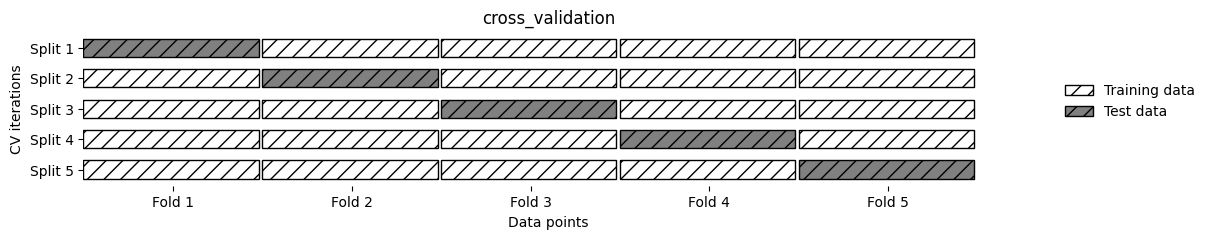

In [72]:
mglearn.plot_cross_validation.plot_cross_validation()

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv = 10)

array([0.88372093, 0.93023256, 0.93023256, 0.93023256, 1.        ,
       0.90697674, 0.9047619 , 0.97619048, 0.92857143, 0.95238095])

In [ ]:
# bias / overfitting
# 모델 잘못 선택 / 

In [75]:
# Model Error

In [ ]:
# learning curve